In [1]:
print("Aditya rahangdale VIT bhopal 21BCY10003")

Aditya rahangdale VIT bhopal 21BCY10003


# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing the dataset

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for Null Values

In [5]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

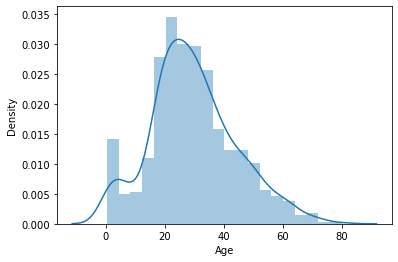

In [7]:
sns.distplot(df["Age"])

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

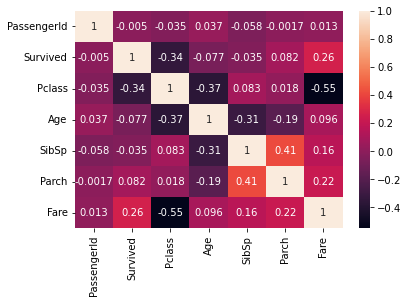

In [9]:
sns.heatmap(df.corr(),annot=True)

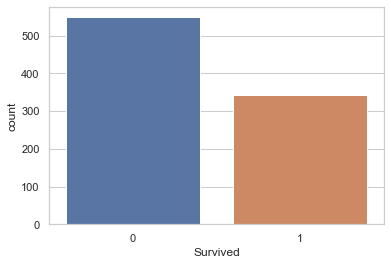

In [10]:
sns.set(style="whitegrid")
sns.countplot(x="Survived", data=df)
plt.show()

# Outlier Detection

In [12]:
numerical_columns = ['Age', 'Fare']
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
threshold = 3
outlier_mask = z_scores > threshold
outliers = df[outlier_mask.any(axis=1)]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
630          631         1       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   
851          852         0       3   

                                                  Name     Sex   Age  SibSp  \
27           

# Splitting Dependent and Independent variables

In [13]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Exclude non-numeric columns from X

In [14]:
X_numeric = X.select_dtypes(include=[np.number])

# Perform Encoding

In [15]:
label_encoder = LabelEncoder()
X["Sex"] = label_encoder.fit_transform(X["Sex"])

# Feature Scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Splitting Data into Train and Test

Number of samples in the test dataset: 179
Basic statistics of the test dataset:
Mean: [-0.03455655 -0.10193644         nan -0.1095822   0.01175234 -0.03059938]
Standard Deviation: [1.00937639 1.04720501        nan 0.6611409  1.06847731 0.79204588]
Minimum: [-1.71066854 -1.56610693         nan -0.4745452  -0.47367361 -0.64842165]
Maximum: [1.72622007 0.82737724        nan 3.15480905 5.73284383 4.6344169 ]


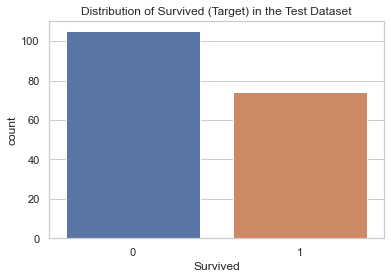

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Number of samples in the test dataset:", len(X_test))
print("Basic statistics of the test dataset:")
print("Mean:", np.mean(X_test, axis=0))
print("Standard Deviation:", np.std(X_test, axis=0))
print("Minimum:", np.min(X_test, axis=0))
print("Maximum:", np.max(X_test, axis=0))
sns.countplot(x=y_test)
plt.title("Distribution of Survived (Target) in the Test Dataset")
plt.show()